<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#План-работы" data-toc-modified-id="План-работы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>План работы</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи-(обучаем-без-учета-урегулирования-дисбаланса)" data-toc-modified-id="Исследование-задачи-(обучаем-без-учета-урегулирования-дисбаланса)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи (обучаем без учета урегулирования дисбаланса)</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## План работы
1. Загружаем и подготавливаем данные.
2. Исследуем баланс классов, обучаем модель без учёта дисбаланса. 
3. Улучшаем качество модели, учитывая дисбаланс классов. Обучаем разные модели и находим лучшую. 
4. Проведим финальное тестирование.

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler  
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score 
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
print(data.shape)

(10000, 14)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Видим, что везде строки заполнены, за исключением Tenure (909 пусты строк). Смотрим из чего состоят другие параметры строк с tenure

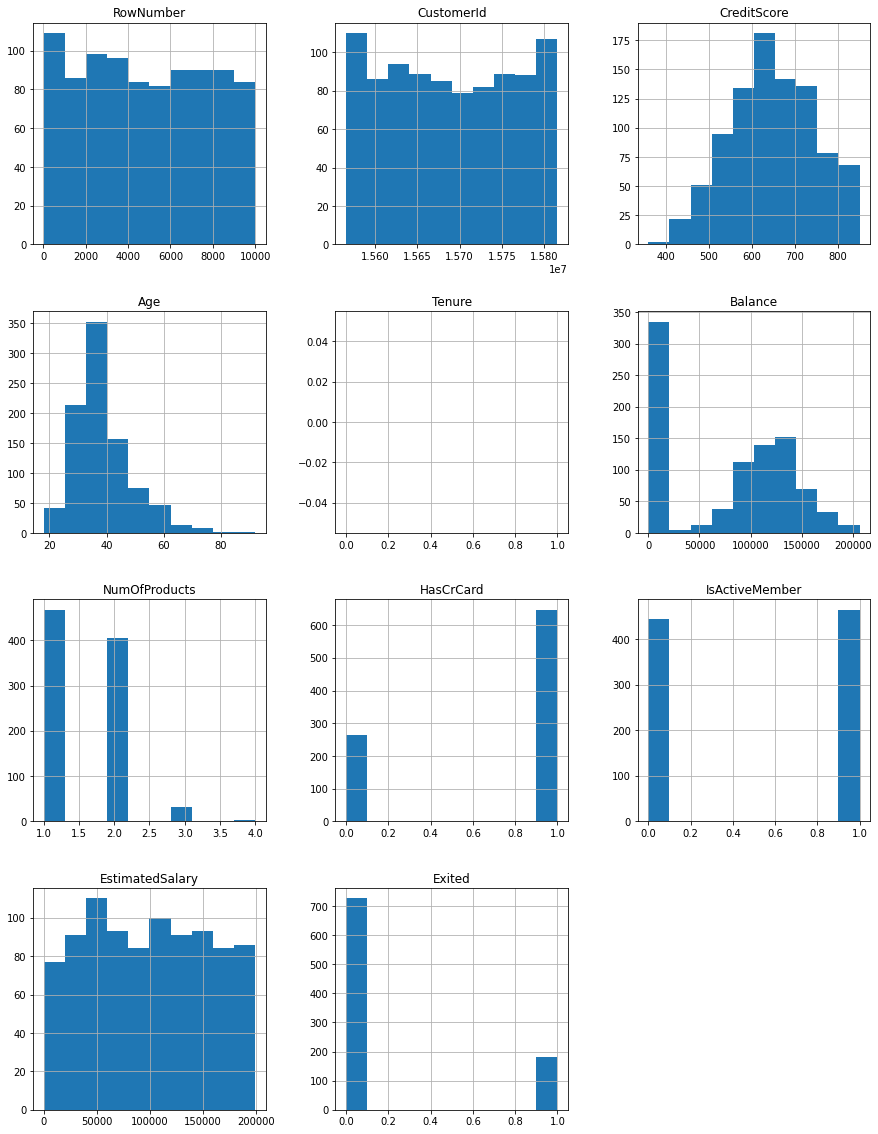

In [5]:
data.loc[data['Tenure'].isna()].hist(figsize=(15, 20));

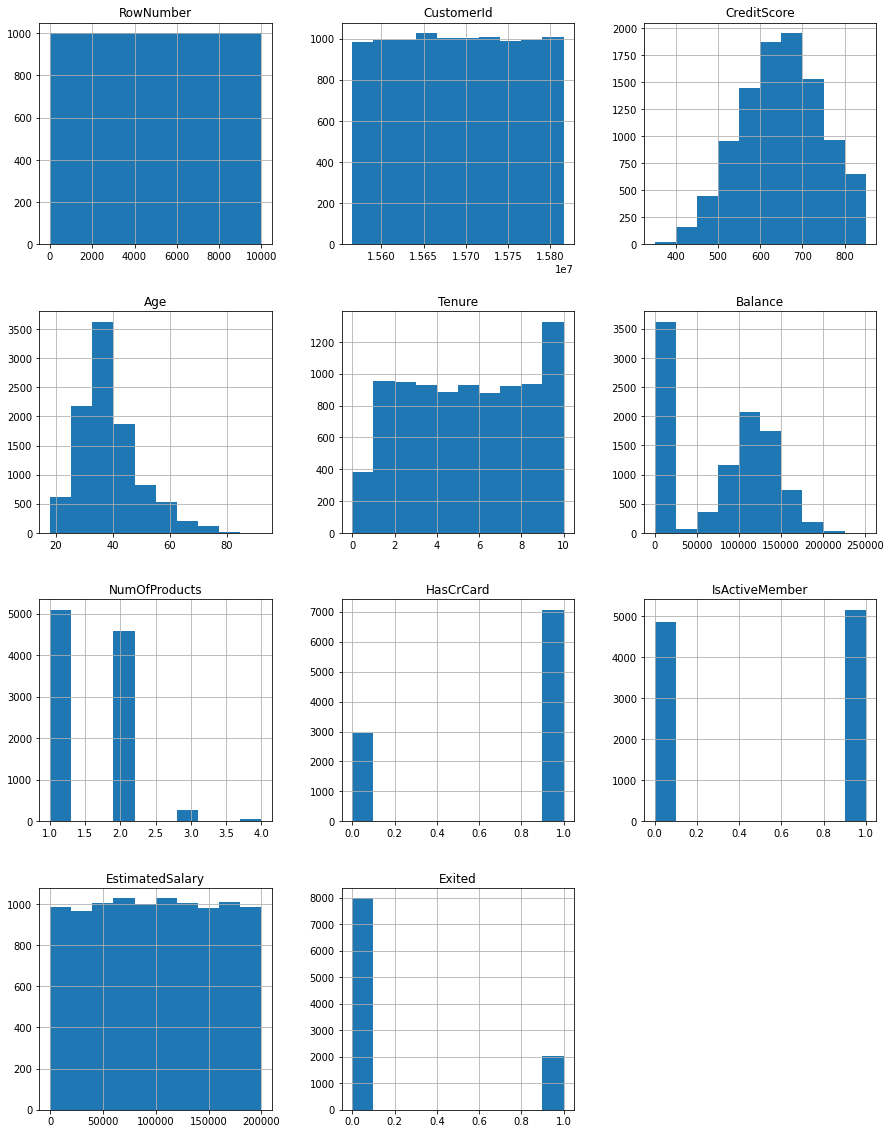

In [6]:
#Теперь посмотрим на то, какие выглядит распределение в целом. 
data.hist(figsize=(15, 20));

Итак, видим, что данные, которые мы планируем удалить в части поведения остальных столбцов не отличаются от остального массива. Также отметим, что данные в удаляемых строяках неоднородные, то есть не видно четких зависимостей. Поскольку заполняя пропуски можем исказить данные, а удалить 9% данных кажется хоть и нежелательным, но приемлемым (с учетом типового характера других полей), то удаляем эти строки.

In [7]:
data = data.loc[~(data['Tenure'].isna())]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


In [9]:
#удаляем ненужные для обсучения столбцы
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1) 
#определеняем целевой признак
target = data['Exited']
features = data.drop('Exited', axis=1)

In [10]:
features_train, features_test0, target_train, target_test0 = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)

In [11]:
print(features_train.shape)
print(target_train.shape)
print(features_test0.shape)
print(target_test0.shape)

(5454, 10)
(5454,)
(3637, 10)
(3637,)


In [12]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test0, target_test0, test_size=0.5, random_state=12345, stratify=target_test0)

In [13]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)
print(features_valid.shape)
print(target_valid.shape)

(5454, 10)
(5454,)
(1818, 10)
(1818,)
(1819, 10)
(1819,)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


In [15]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

In [16]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(5454, 11)
(1819, 11)
(1818, 11)


In [17]:
#Теперь, чтобы модель не путала значения настраиваем масштабирование числовых переменных
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [18]:
print(features_train['Tenure'].isnull().sum())
print(features_valid['Tenure'].isnull().sum())
print(features_test['Tenure'].isnull().sum())

0
0
0


In [19]:
#Смотрим есть ли дисбаланс
sum(target/len(target))
#то есть количество клиентов, которые перестали пользоваться услугами банка порядка 20%, наблюдается дисбаланс
1- sum(target/len(target))

0.7960620393795999

<function matplotlib.pyplot.show(close=None, block=None)>

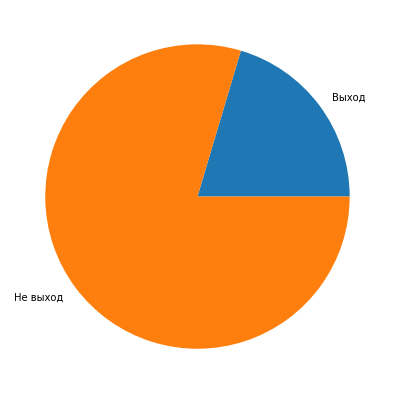

In [20]:
types = ['Выход', 'Не выход']
data = [sum(target/len(target)), 1- sum(target/len(target))]
fig = plt.figure(figsize=(10,7))
plt.pie(data, labels=types)
plt.show

Подвывод: данные отработали, пропуски заполнили, разделили данные на тестовые, валидационные и обучающие.
Изучили дисбаланс, нашли, что он есть, ибо большинство клиентов (80%) остаются.

## Исследование задачи (обучаем без учета урегулирования дисбаланса)

Тестируем 3 модели: 
1. Дерево решений 
2. Лес
3. Логистическая регрессия. 

### Дерево решений

In [21]:
%%time
best_model = None
best_f1 = 0
best_est = 0
best_depth = 0
for est in range(100, 101, 7):
    for depth in range(6, 16):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_model = model
            best_f1 = f1
            best_depth = depth
print('Оптимальная глубина дерева =', best_depth)
print('Качество модели - ', best_f1)  

Оптимальная глубина дерева = 7
Качество модели -  0.557659208261618
CPU times: user 1.9 s, sys: 6.1 ms, total: 1.9 s
Wall time: 1.9 s


### Случайный лес

In [22]:
best_result = 0
best_model = None
best_est = 0
best_depth = 0
results = []
for est in tqdm(range(10, 101, 10)):
    for depth in range (1, 21):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        results.append({'accuracy': result, 'depth':depth, 'est':est})
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
print('f1 лучшей модели для леса:', best_result)
print('Глубина для лучшей модели:', best_depth)
print('Количество деревьев для лучшей модели:', best_est)

100%|██████████| 10/10 [00:55<00:00,  5.60s/it]

f1 лучшей модели для леса: 0.5785123966942148
Глубина для лучшей модели: 18
Количество деревьев для лучшей модели: 80


#3 Добавляем базовые вычисления с логистической регрессией

In [23]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print('f1 логистической регрессии (c балансированными весами):', result)

f1 логистической регрессии (c балансированными весами): 0.35203094777562866


Вывод: Без устранения дисбаланса лучше всего себя показала модель случайного леса, 
достигшая f1 = 0.578 с глубиной 18 и количеством деревьев 80

## Борьба с дисбалансом

Количество выходов в 4 раза меньше, чем количество не выходов, соответственно, чтобы сбалансировать необходимо увеличить количество выходов в 4 раза/ уменьшить количество невыходов в 4 раза.

In [24]:
#1. Используем апсэмплинг
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(target_upsampled.value_counts(normalize = 1))
print(target_upsampled.shape)

1    0.50603
0    0.49397
Name: Exited, dtype: float64
(8790,)


Проверили успешность апсэмплинга, получилось

In [25]:
#2 Используем downsampling
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
print(target_downsampled.value_counts(normalize = 1))
print(target_downsampled.shape)

1    0.505914
0    0.494086
Name: Exited, dtype: float64
(2198,)


In [ ]:
Проверили успешность даунсемплинга, получилось

In [27]:
#1 Перепроверяем случайный лес с учетом калибровки (предыдущие результаты: Оптимальное количество оценок = 71, 
# Оптимальная глубина дерева = 11, Качество модели -  0.5803108808290156)
  #1.1. При апсэмплинге: 

best_result = 0
best_model = None
best_est = 0
best_depth = 0
results = []
for est in tqdm(range(10, 101, 10)):
    for depth in range (1, 21):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        results.append({'accuracy': result, 'depth':depth, 'est':est})
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
print('f1 лучшей модели для леса:', best_result)
print('Глубина для лучшей модели:', best_depth)
print('Количество деревьев для лучшей модели:', best_est)    

100%|██████████| 10/10 [01:16<00:00,  7.69s/it]

f1 лучшей модели для леса: 0.6115007012622721
Глубина для лучшей модели: 13
Количество деревьев для лучшей модели: 30


In [28]:
  #1.2. При даунсэмплинге: 
best_result = 0
best_model = None
best_est = 0
best_depth = 0
results = []
for est in tqdm(range(10, 101, 10)):
    for depth in range (1, 21):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        results.append({'accuracy': result, 'depth':depth, 'est':est})
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
print('f1 лучшей модели для леса:', best_result)
print('Глубина для лучшей модели:', best_depth)
print('Количество деревьев для лучшей модели:', best_est) 

100%|██████████| 10/10 [00:31<00:00,  3.14s/it]

f1 лучшей модели для леса: 0.5862068965517241
Глубина для лучшей модели: 8
Количество деревьев для лучшей модели: 10


подвывод по случайному лесу: 
Было:
f1 лучшей модели для леса: 0.5785123966942148
Глубина для лучшей модели: 18
Количество деревьев для лучшей модели: 80

Стало (с апсэмплингом эффективней):
f1 лучшей модели для леса: 0.6115007012622721
Глубина для лучшей модели: 13
Количество деревьев для лучшей модели: 30

In [30]:
#2 Перепроверяем десижн три с учетом калибровки (предыдущие результаты: Оптимальная глубина дерева = 7, 
# Качество модели -  0.5340314136125655)
  #1.1. При апсэмплинге: 

best_model = None
best_f1 = 0
best_est = 0
best_depth = 0
for est in range(50, 101, 7):
    for depth in range(6, 16):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_model = model
            best_f1 = f1
            best_depth = depth
print('Оптимальная глубина дерева =', best_depth)
print('Качество модели - ', best_f1)


Оптимальная глубина дерева = 8
Качество модели -  0.5711060948081264


In [31]:
  #1.2. При даунсэмплинге:


best_model = None
best_f1 = 0
best_est = 0
best_depth = 0
for est in range(50, 101, 7):
    for depth in range(6, 16):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_model = model
            best_f1 = f1
            best_depth = depth
print('Оптимальная глубина дерева =', best_depth)
print('Качество модели - ', best_f1)


Оптимальная глубина дерева = 6
Качество модели -  0.5571725571725571


Подвывод по решающему дереву:
Было:
Оптимальная глубина дерева = 7
Качество модели -  0.557659208261618
CPU times: user 1.9 s, sys: 6.1 ms, total: 1.9 s
Wall time: 1.9 s

Стало:
Оптимальная глубина дерева = 8
Качество модели -  0.5711060948081264

Вывод: с апсэмплингом лучше, но уступает случайному лесу

In [ ]:
#3 Перепроверяем логичстическую регрессию с учетом калибровки (предыдущие результаты: Оптимальная глубина дерева = 7, 
# Качество модели -  0.5340314136125655)
  #1.1. При апсэмплинге: 

In [40]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print('f1 логистической регрессии (c балансированными весами):', result)

f1 логистической регрессии (c балансированными весами): 0.5038022813688213


In [35]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print('f1 логистической регрессии (c балансированными весами):', result)


f1 логистической регрессии (c балансированными весами): 0.5089538171536288


In [39]:
#теперь сбалансированный в гиперпараметре

model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print('f1 логистической регрессии (c балансированными весами):', result)


f1 логистической регрессии (c балансированными весами): 0.5082125603864733


Подвывод по логистической регрессии:  

Было: Вывод: Без устранения дисбаланса лучше всего себя показала модель случайного леса, 
достигшая f1 = 0.578 с глубиной 18 и количеством деревьев 80

Стало (лучшая при наунсэмплинге): 0.5089538171536288

Вывод: рэндом форест при апсэмплинге работает лучше всего, результат хороший: 0.6115007012622721.

Итак, результаты удовлетворяют параметрам проекта, оставляем

In [42]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 0.7, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid) 
    recall = recall_score(target_valid, predicted_valid) 
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1 = {:.3f}".format(
        threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.204, Полнота = 1.000, f1 = 0.339
Порог = 0.02 | Точность = 0.204, Полнота = 1.000, f1 = 0.339
Порог = 0.04 | Точность = 0.204, Полнота = 1.000, f1 = 0.339
Порог = 0.06 | Точность = 0.204, Полнота = 0.997, f1 = 0.339
Порог = 0.08 | Точность = 0.205, Полнота = 0.997, f1 = 0.340
Порог = 0.10 | Точность = 0.207, Полнота = 0.995, f1 = 0.343
Порог = 0.12 | Точность = 0.210, Полнота = 0.992, f1 = 0.347
Порог = 0.14 | Точность = 0.214, Полнота = 0.989, f1 = 0.352
Порог = 0.16 | Точность = 0.218, Полнота = 0.984, f1 = 0.356
Порог = 0.18 | Точность = 0.222, Полнота = 0.978, f1 = 0.362
Порог = 0.20 | Точность = 0.228, Полнота = 0.970, f1 = 0.369
Порог = 0.22 | Точность = 0.235, Полнота = 0.965, f1 = 0.378
Порог = 0.24 | Точность = 0.243, Полнота = 0.962, f1 = 0.388
Порог = 0.26 | Точность = 0.252, Полнота = 0.951, f1 = 0.398
Порог = 0.28 | Точность = 0.258, Полнота = 0.941, f1 = 0.405
Порог = 0.30 | Точность = 0.267, Полнота = 0.930, f1 = 0.415
Порог = 0.32 | Точность 

Лучшее Порог = 0.56 | Точность = 0.433, Полнота = 0.625, f1 = 0.512 (портит значение)

In [43]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7781529686825215


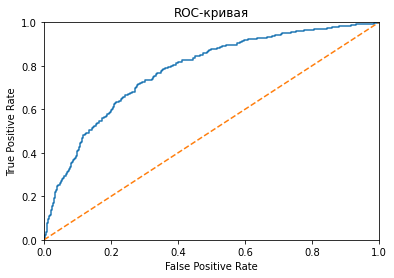

In [44]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)  

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.plot([0, 1], [0, 1], linestyle='--')


AUC ROC выше 0.5, но не дотягивает до 1, в целом значение неплохое

## Тестирование модели

In [45]:
model=RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=13)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_test)

print("F1:", f1_score(target_test, predicted_valid))
#f1 на тестовой уже значительно ниже, чем при обучении


F1: 0.6058981233243967


На тестовой выборке удалось достичь неплохого значения f1, удовлетворяет требованиям работы

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*

Общий вывод по итогам проекта: 
Мы провели работу с данными, заполнили пропуски. 
Выбрали наилучшую модель, на этой модели работали с дисбалансом классов и с помощью апсемплинга дотянули f1 до приемлемго уровня (0.61). 
На тестовой выборке уже f1 немного испортился, но все равно ок 0.6058. Задача выполнена.